<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Peering-inside-the-Black-Box/LSTM_Input_Pearson_correlation-p-values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Importing essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load data
dataset = pd.read_csv('B-T-median_+col-names_-learner-type-Shapley-SUM.csv')

In [129]:
# Display all data
dataset.head(56)

,2310001H17Rik,Kdm7a,Mtpap,Ets1,Tvp23b,Ttc3,Wdr43,Ptcd3,Pld4,Rars2,Dapp1,Chchd7,Ets1.1,Mapk9,Ddx50,Tnfaip3,Brox,Tcrg-C4,Rasa1,Gnas,Bin1,Umps,Zfp639,Ms4a6b,Stk38,Wac,Celf2,Setdb2,Usp15
0,1.000,0.393,0.285,0.527,0.379,0.827,0.627,0.743,1.000,1.000,0.904,0.723,0.638,0.658,1.000,0.361,0.456,0.148,1.000,0.802,1.000,0.659,0.197,0.468,0.867,0.956,1.000,0.675,0.833
1,0.000,0.581,0.255,0.515,0.000,0.833,0.283,0.000,1.000,1.000,0.903,0.676,0.000,0.000,0.788,0.692,0.516,0.000,0.720,0.686,0.586,0.000,0.000,0.000,0.780,0.000,0.000,0.000,0.000
2,0.000,1.000,0.614,1.000,0.000,1.000,0.791,0.000,0.805,1.000,1.000,1.000,0.000,0.000,0.582,1.000,0.239,0.000,0.809,0.711,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
3,1.000,0.316,1.000,0.716,1.000,0.262,0.797,0.918,1.000,1.000,0.958,0.610,0.760,0.832,0.874,0.458,1.000,0.000,0.607,1.000,0.764,0.592,1.000,0.742,0.915,0.868,0.942,0.778,0.914
4,0.564,0.447,0.705,0.578,1.000,0.776,0.283,1.000,0.991,1.000,0.670,0.723,0.572,0.355,0.704,0.294,0.790,0.000,0.367,1.000,0.422,0.478,0.087,0.243,0.748,0.831,0.849,0.588,0.719
5,1.000,0.600,0.374,0.438,1.000,1.000,0.404,0.776,1.000,1.000,0.781,0.439,0.527,1.000,1.000,0.654,0.776,0.000,0.351,0.607,0.574,0.717,0.141,0.214,0.569,0.740,1.000,0.538,0.766
6,1.000,1.000,1.000,0.696,0.419,1.000,0.289,0.678,1.000,1.000,0.872,0.343,0.558,0.869,1.000,0.573,1.000,0.313,1.000,0.407,1.000,1.000,0.052,0.436,1.000,0.925,1.000,1.000,0.903
7,0.000,1.000,1.000,1.000,0.000,1.000,0.549,0.000,0.755,1.000,0.829,1.000,0.000,0.000,0.650,1.000,0.759,0.000,1.000,0.669,0.817,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
8,0.712,0.787,1.000,0.729,1.000,0.854,0.490,0.767,1.000,1.000,0.814,0.566,0.695,1.000,0.885,1.000,0.557,0.000,1.000,1.000,1.000,0.679,0.247,0.513,0.824,0.718,1.000,0.599,0.882
9,1.000,0.298,0.249,0.572,0.213,0.318,0.404,0.576,1.000,1.000,0.881,0.378,0.547,0.832,1.000,1.000,1.000,0.000,0.377,1.000,0.725,0.243,0.131,0.493,0.757,1.000,0.974,1.000,0.570


In [130]:
# Describe the data; 56 samples, range of 0 to 1 (not z-scored)
dataset.describe()

,2310001H17Rik,Kdm7a,Mtpap,Ets1,Tvp23b,Ttc3,Wdr43,Ptcd3,Pld4,Rars2,Dapp1,Chchd7,Ets1.1,Mapk9,Ddx50,Tnfaip3,Brox,Tcrg-C4,Rasa1,Gnas,Bin1,Umps,Zfp639,Ms4a6b,Stk38,Wac,Celf2,Setdb2,Usp15
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.667286,0.689214,0.785518,0.780054,0.744232,0.816446,0.716411,0.749911,0.880018,0.825911,0.852411,0.662339,0.702321,0.747982,0.833750,0.745054,0.761268,0.149786,0.795964,0.646339,0.782857,0.629929,0.491875,0.528018,0.839393,0.735750,0.799339,0.638643,0.740643
std,0.373938,0.311914,0.299548,0.249634,0.375065,0.261419,0.307765,0.344487,0.223891,0.264720,0.234889,0.251074,0.325165,0.345266,0.242888,0.331375,0.276906,0.239348,0.271570,0.348948,0.278606,0.320031,0.449976,0.381622,0.233316,0.327935,0.342089,0.369270,0.327794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.414000,0.471750,0.614000,0.650500,0.680500,0.744500,0.508000,0.659250,0.864750,0.715000,0.811750,0.543750,0.570500,0.658000,0.743750,0.511250,0.609000,0.000000,0.710750,0.370500,0.677250,0.521750,0.095250,0.176750,0.810750,0.716250,0.795250,0.393000,0.747750
50%,0.816500,0.712500,0.938000,0.872000,1.000000,0.900500,0.830500,0.918500,0.941500,1.000000,0.927000,0.713500,0.823000,0.883500,0.911000,1.000000,0.803000,0.000000,0.878000,0.698500,0.902000,0.702500,0.219000,0.523000,0.899000,0.833000,0.945000,0.642000,0.869000
75%,1.000000,1.000000,1.000000,0.960250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.824000,0.955500,1.000000,1.000000,1.000000,1.000000,0.343000,1.000000,1.000000,1.000000,0.882750,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.941750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Set Seaborn Style defaults
sns.set(style = 'ticks', font= 'sans-serif', font_scale=1.25)

In [132]:
# Pearson Correlation of columns
corr = dataset.corr(method='pearson')
print (corr)

#Export correlation values to a csv file
corr.to_csv('column pairwise PC values_LSTM.csv')

               2310001H17Rik     Kdm7a     Mtpap  ...     Celf2    Setdb2     Usp15
2310001H17Rik       1.000000 -0.121580  0.092155  ...  0.682807  0.525546  0.692703
Kdm7a              -0.121580  1.000000  0.593144  ... -0.198501 -0.081680 -0.202018
Mtpap               0.092155  0.593144  1.000000  ...  0.144308  0.104003  0.102163
Ets1               -0.059645  0.623003  0.752098  ... -0.147912  0.081531 -0.093264
Tvp23b              0.642558 -0.147527  0.201428  ...  0.761437  0.563948  0.815966
Ttc3                0.008435  0.493428  0.551675  ... -0.047107  0.072850 -0.049793
Wdr43               0.023661  0.535455  0.651210  ... -0.009586  0.119470  0.075818
Ptcd3               0.633094 -0.187774  0.190250  ...  0.896946  0.652204  0.858767
Pld4                0.096643  0.423887  0.497439  ... -0.055057  0.088982 -0.145000
Rars2               0.121531  0.396611  0.347547  ... -0.147024  0.008132 -0.211212
Dapp1               0.096092  0.522391  0.693172  ...  0.031845  0.158928 -0

In [133]:
# Significant Pearson's correlation values with two-tailed t-test and Benjamini/Hochberg FDR correction
!pip install pingouin
from pingouin import pairwise_corr
pairwise_corr (dataset, method='pearson', tail = 'two-sided', padjust='fdr_bh')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,p-corr,p-adjust,BF10,power
0,2310001H17Rik,Kdm7a,pearson,two-sided,56,-0.122,"[-0.37, 0.15]",0.015,-0.022,-0.123,3.720627e-01,5.773621e-01,fdr_bh,0.246,0.146
1,2310001H17Rik,Mtpap,pearson,two-sided,56,0.092,"[-0.17, 0.35]",0.008,-0.029,0.092,4.993494e-01,6.872401e-01,fdr_bh,0.208,0.104
2,2310001H17Rik,Ets1,pearson,two-sided,56,-0.060,"[-0.32, 0.21]",0.004,-0.034,-0.060,6.623539e-01,7.920438e-01,fdr_bh,0.183,0.072
3,2310001H17Rik,Tvp23b,pearson,two-sided,56,0.643,"[0.46, 0.77]",0.413,0.391,0.763,9.354197e-08,5.274728e-07,fdr_bh,1.776e+05,1.000
4,2310001H17Rik,Ttc3,pearson,two-sided,56,0.008,"[-0.26, 0.27]",0.000,-0.038,0.008,9.508011e-01,9.685384e-01,fdr_bh,0.167,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Wac,Setdb2,pearson,two-sided,56,0.705,"[0.54, 0.82]",0.497,0.478,0.877,1.331289e-09,1.175007e-08,fdr_bh,9.883e+06,1.000
402,Wac,Usp15,pearson,two-sided,56,0.862,"[0.77, 0.92]",0.742,0.733,1.301,1.540105e-17,6.945129e-16,fdr_bh,3.693e+14,1.000
403,Celf2,Setdb2,pearson,two-sided,56,0.673,"[0.5, 0.8]",0.453,0.433,0.816,1.294171e-08,9.382738e-08,fdr_bh,1.148e+06,1.000
404,Celf2,Usp15,pearson,two-sided,56,0.892,"[0.82, 0.94]",0.796,0.789,1.432,2.658630e-20,2.158808e-18,fdr_bh,1.644e+17,1.000


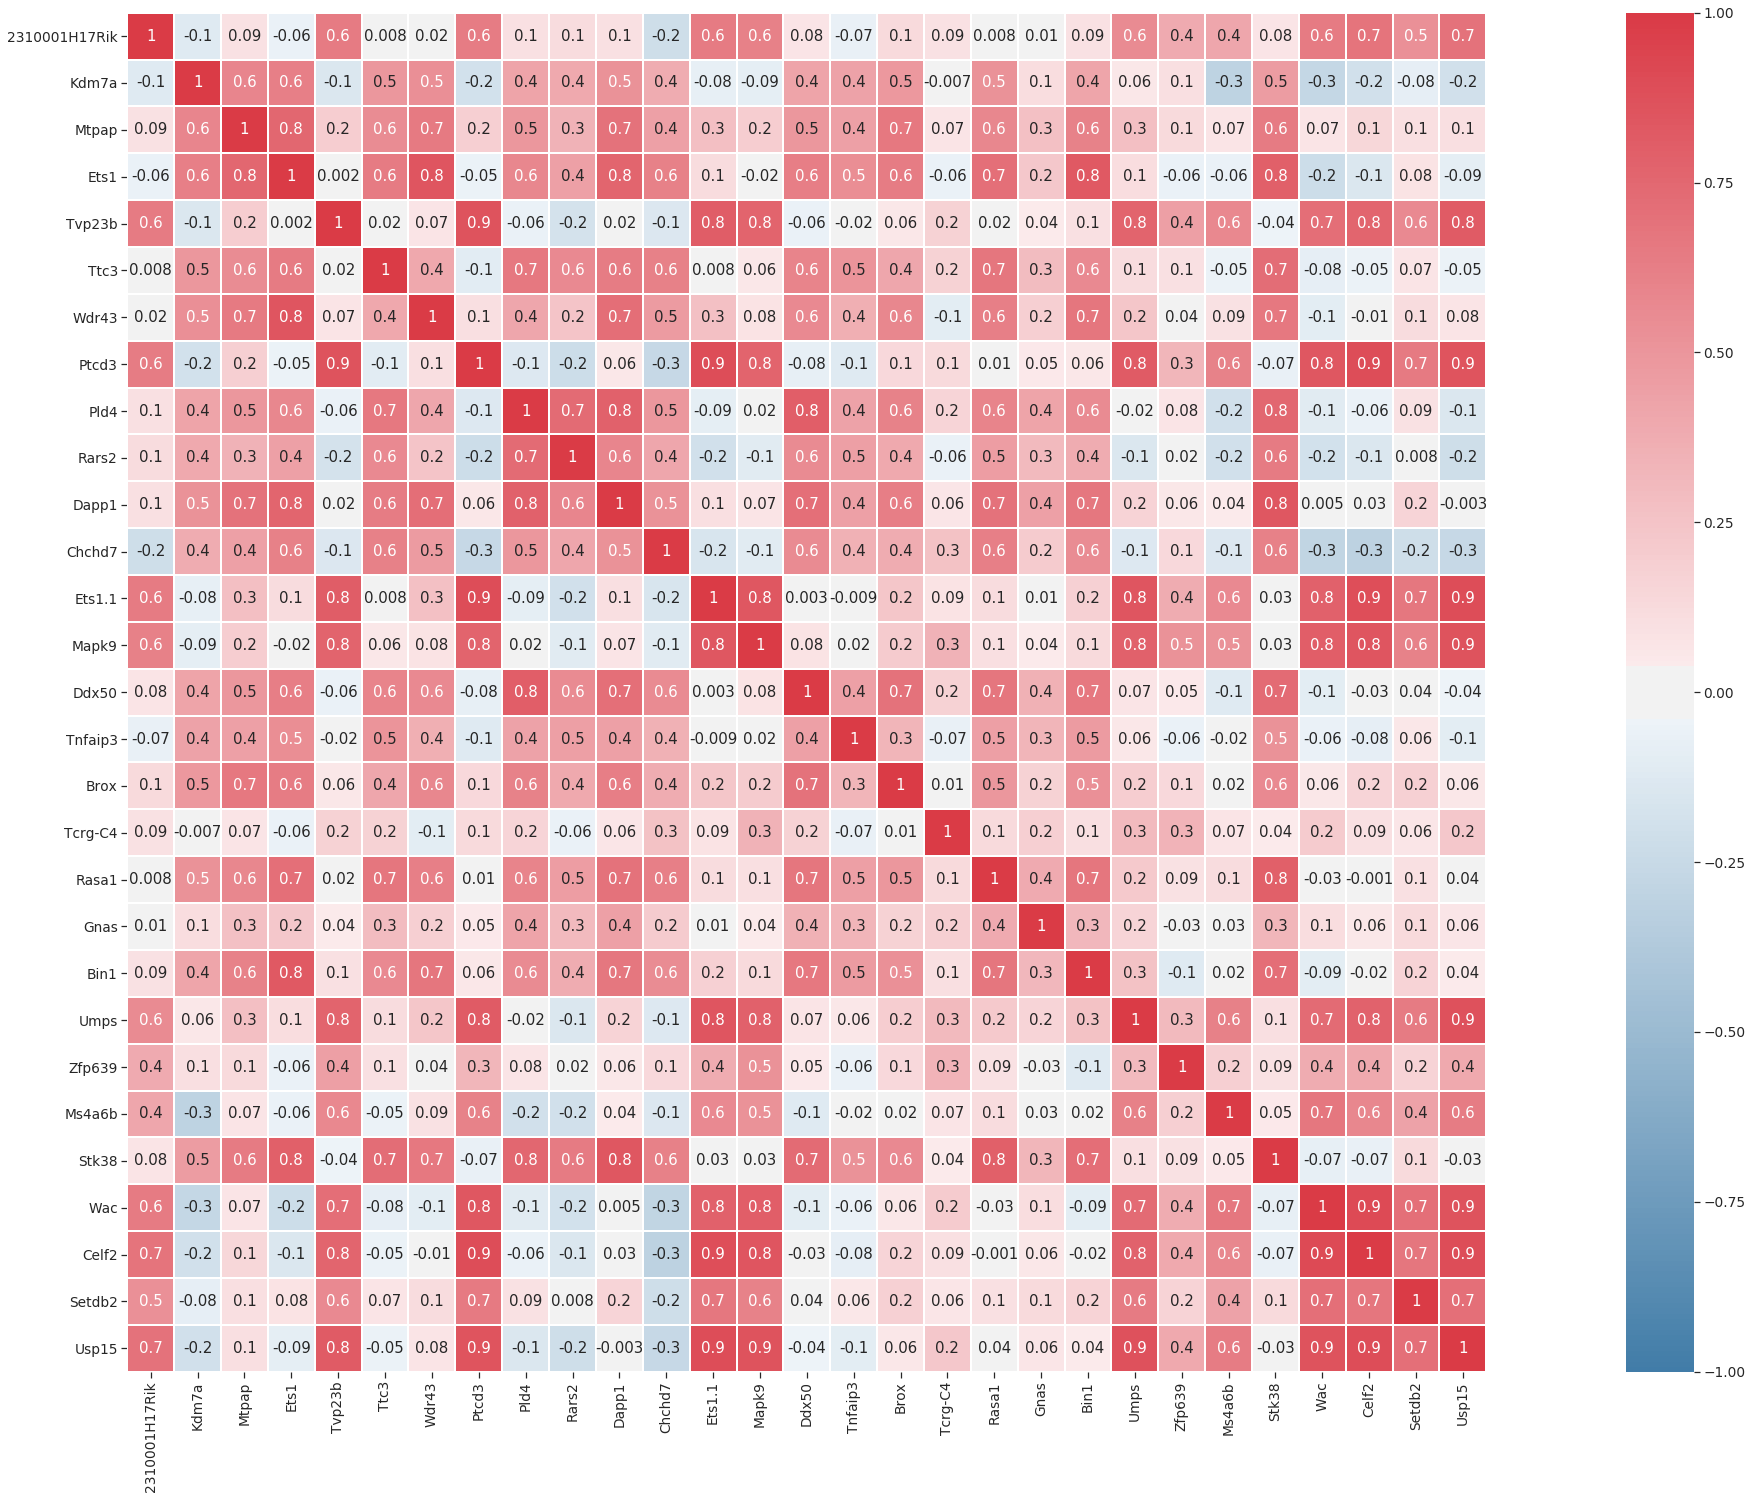

In [134]:
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Mask the mirror image across the diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap without the mask, correct aspect ratio and the etire range of Pearson's correlation (-1 to +1)
sns.heatmap(corr, linewidths=1, linecolor = 'white', cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1}, annot = True, fmt='0.1g' )

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median_Shapley-Sum.svg', format = 'svg')

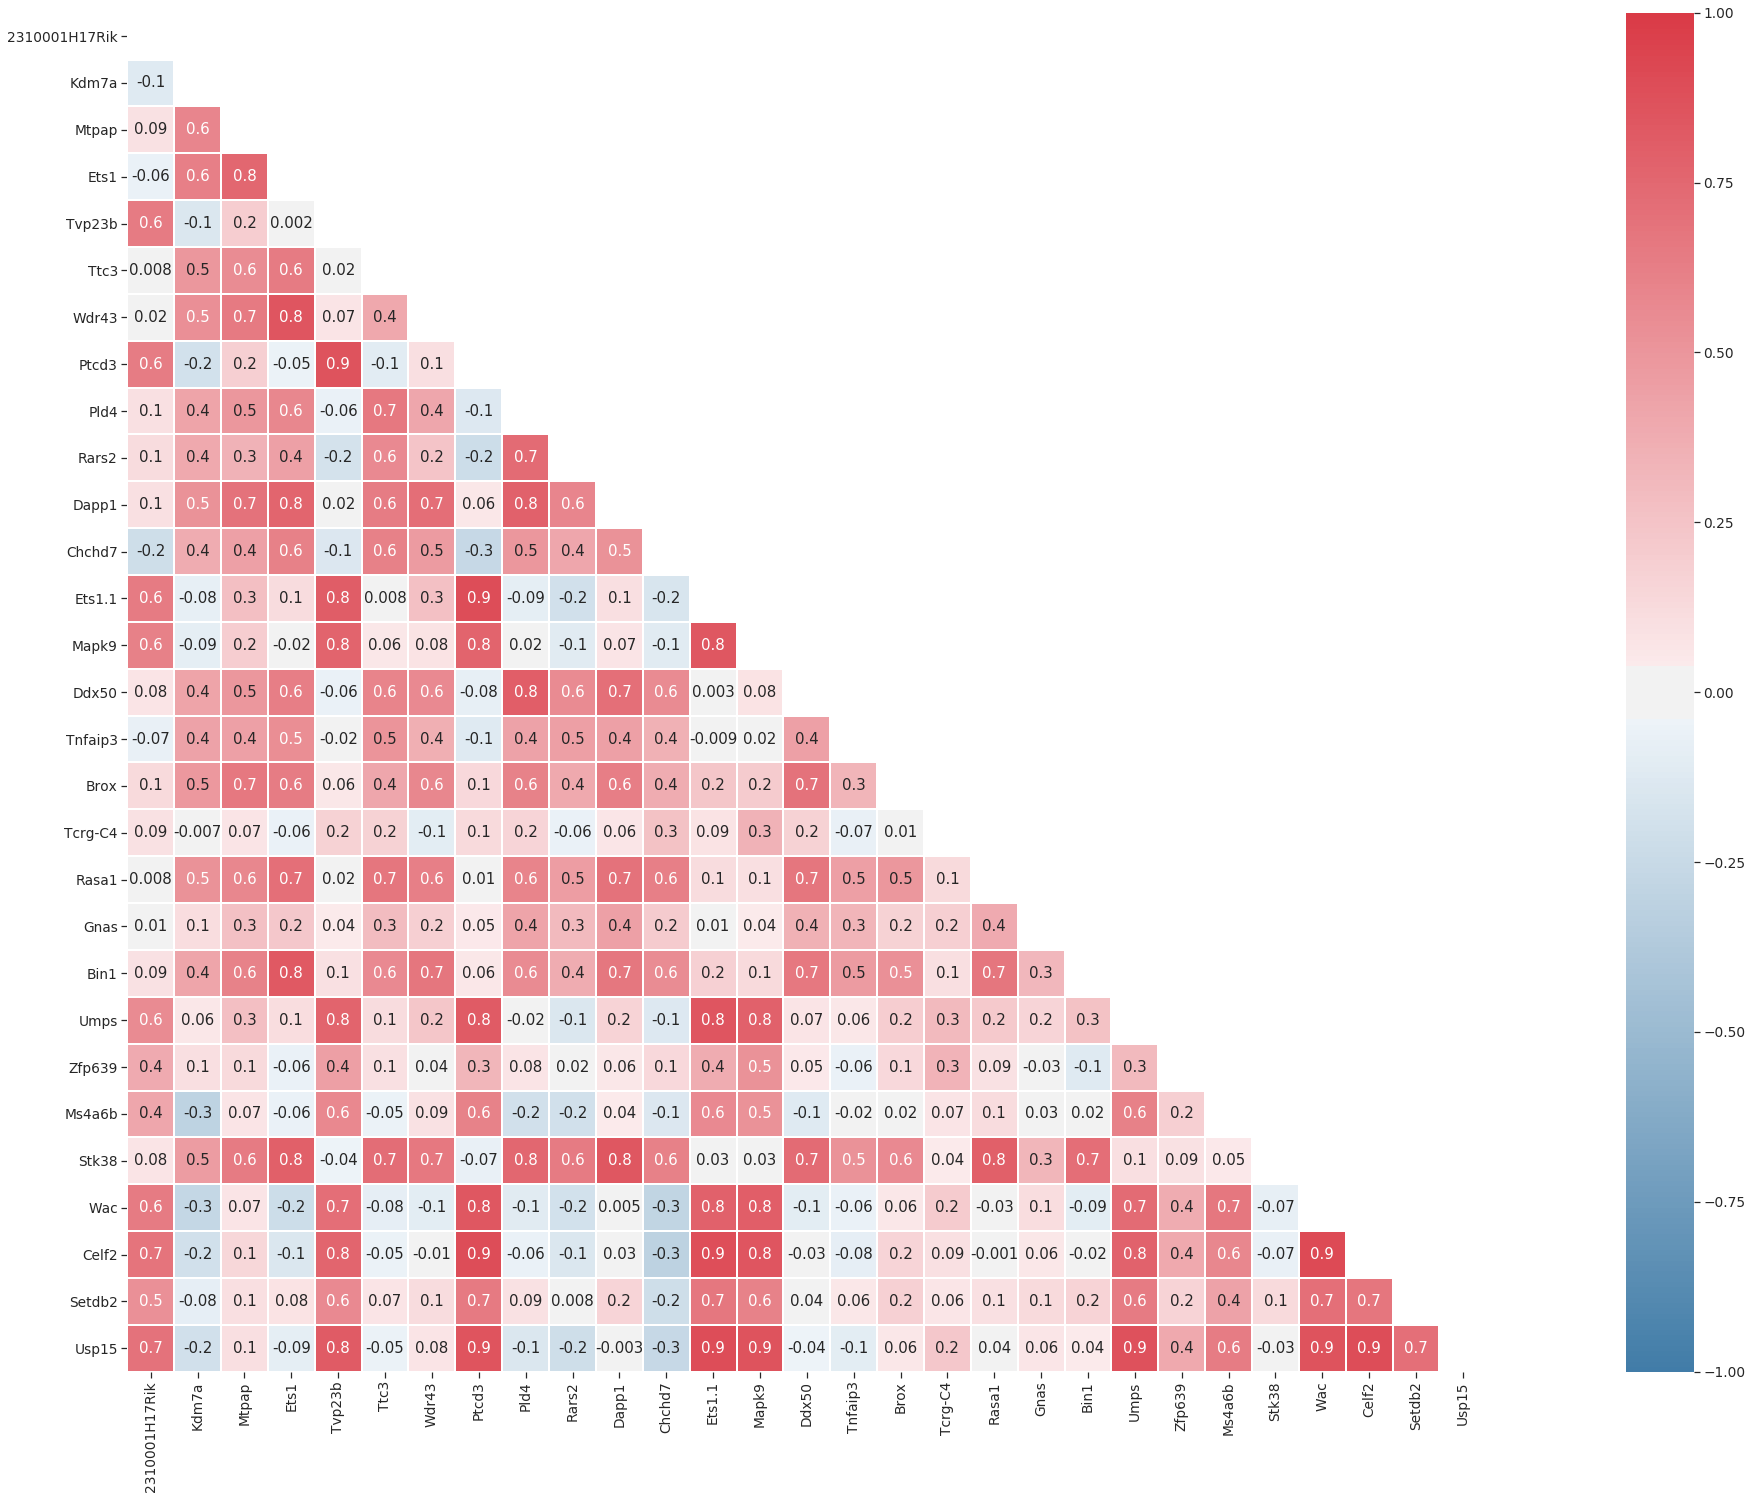

In [135]:
# Plotting the half-diagonal heatmap (with mask)
f,ax = plt.subplots(figsize=(50,25))
sns.heatmap(corr, linewidths=1, linecolor = 'white', mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1}, annot = True, fmt='0.1g')

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median_half diagonal_Shapley-SUM.svg', format = 'svg')

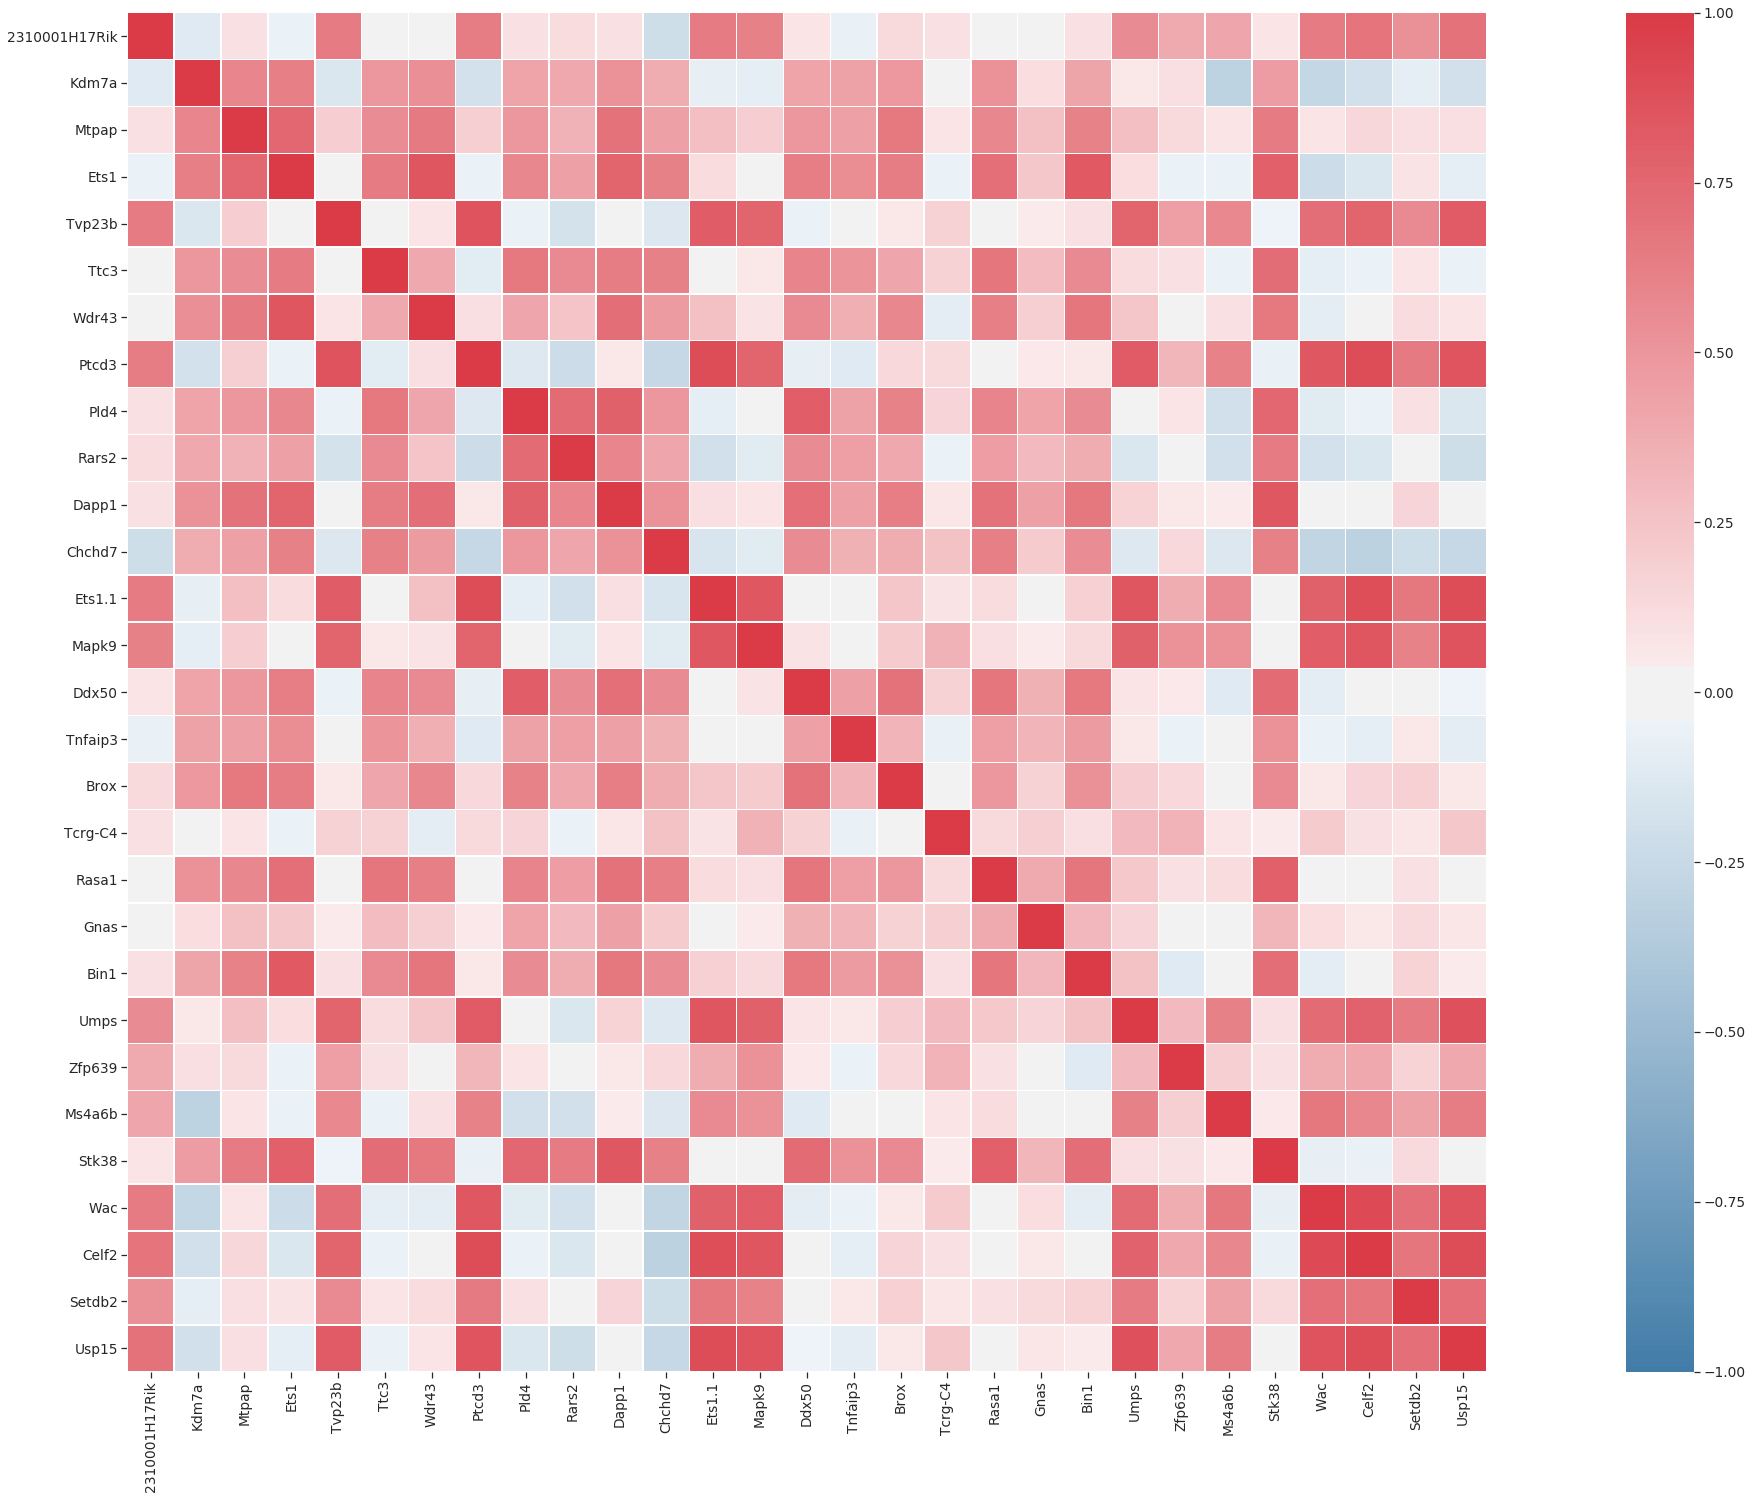

In [136]:
#No annotations inside cells

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Mask the mirror image across the diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap without the mask, correct aspect ratio and the etire range of Pearson's correlation (-1 to +1)
sns.heatmap(corr, linewidths=0.5, linecolor = 'white', cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median_no annot_Shapley-Sum.svg', format = 'svg')

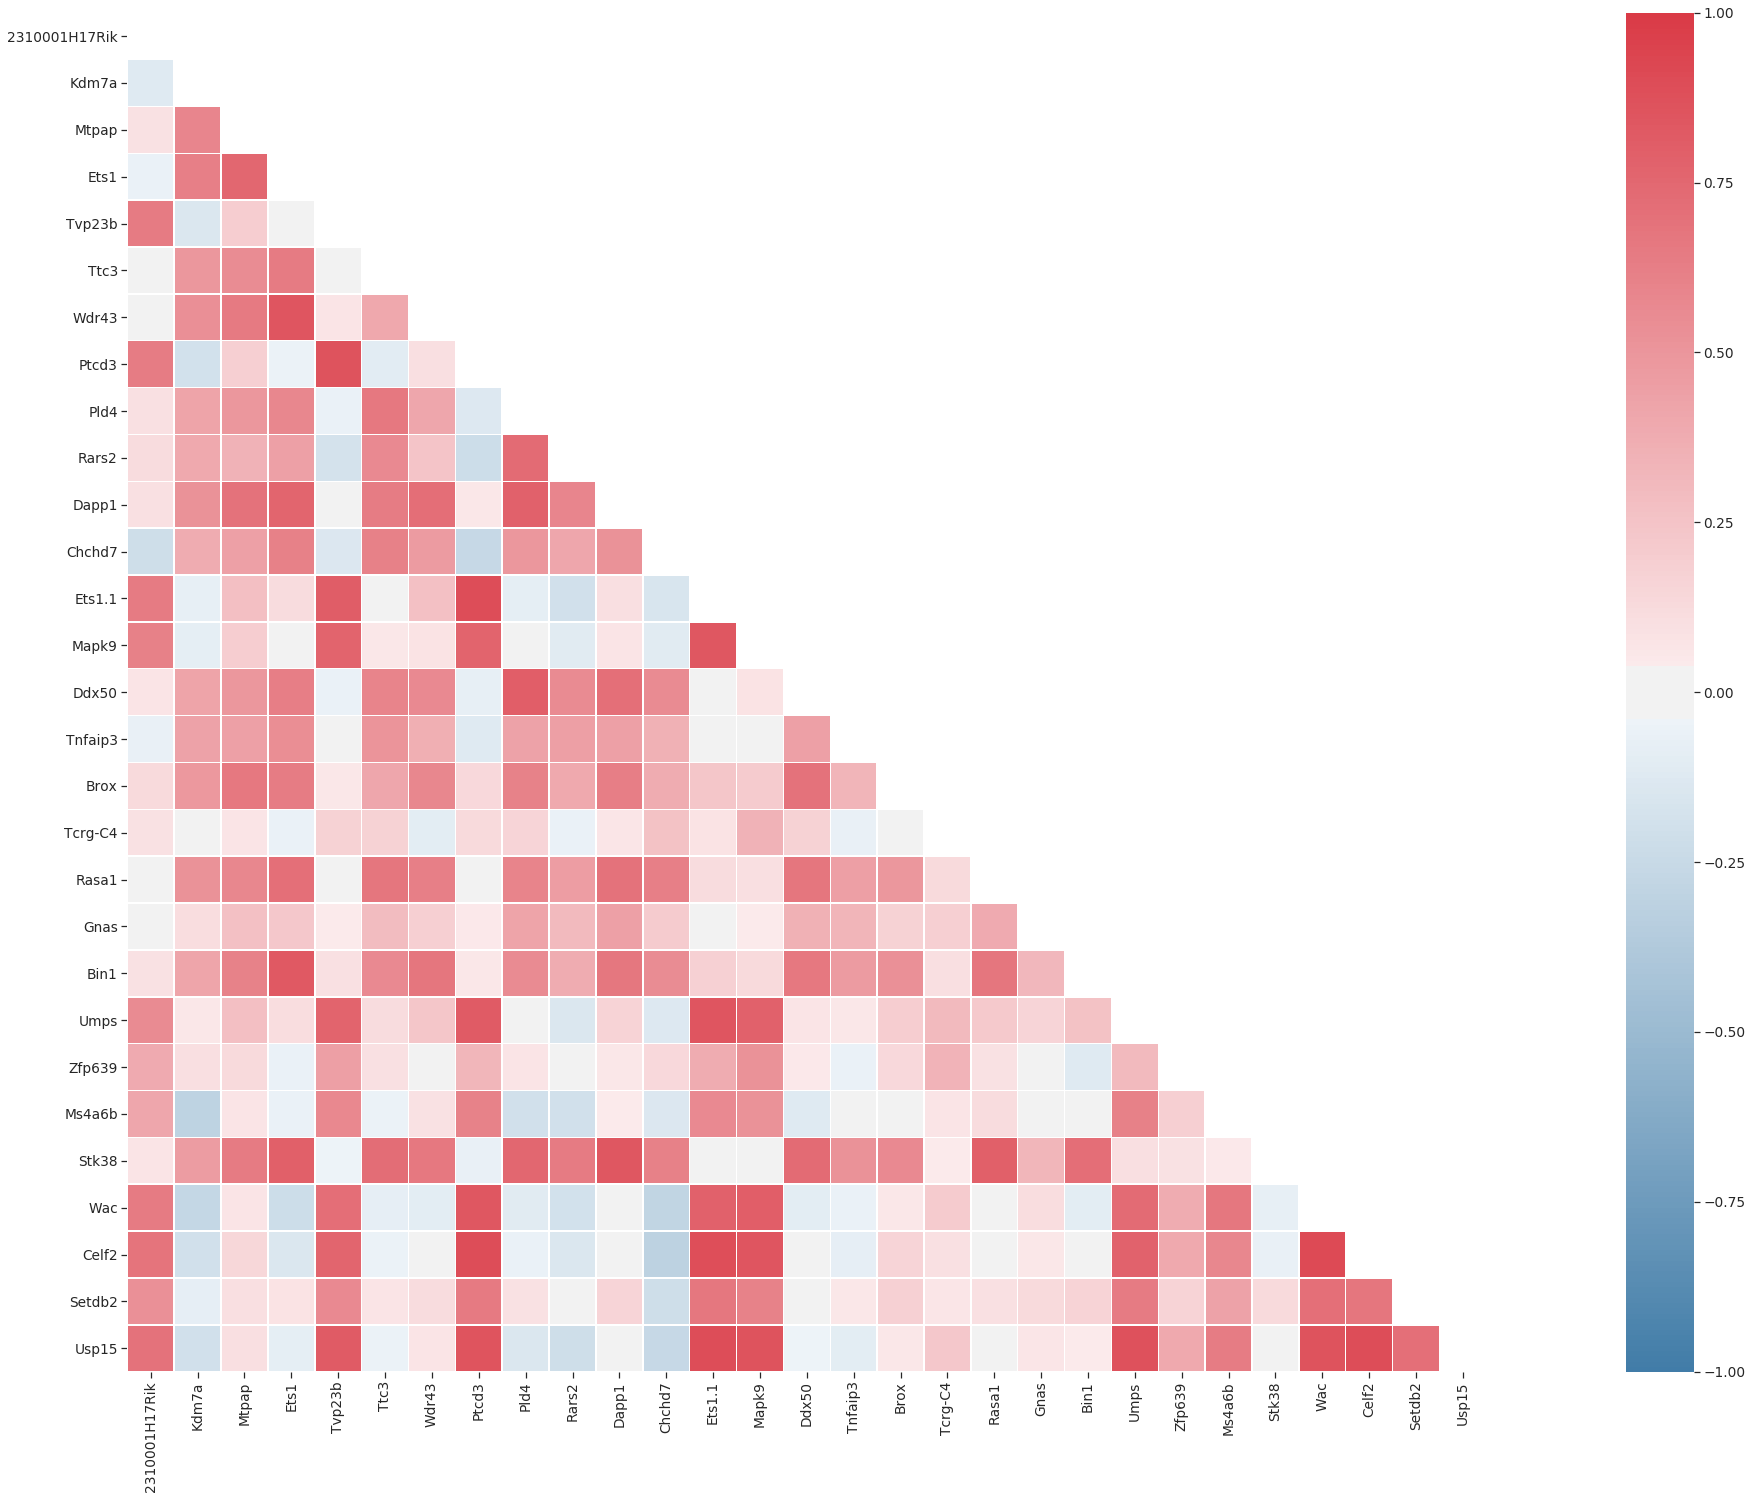

In [137]:
# Plotting the half-diagonal heatmap (with mask & no annotations))
f,ax = plt.subplots(figsize=(50,25))
sns.heatmap(corr, linewidths=0.5, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median_half-diagonal_no annot-Shapley-Sum.svg', format = 'svg')